Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed.pkl")

In [4]:
data.head()

,Would_live_in_another_neighborhood,District,Gender,Time_living_in_barri,Barri_evolution,BCN_evolution,Barri_future,BCN_future,Barri_satisfaction_of_living,BCN_satisfaction_of_living,...,Financial_situation,Help_with_housework,Disability,Living_with_disabled_person,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_citizen_security
0,0.0,SANTS - MONTJUÏC,0,MORE THAN 10 YEARS,IT IS WORSE,IT IS THE SAME,IT WILL GET WORSE,IT WILL STAY THE SAME,SATISFIED,SATISFIED,...,GOOD,0.0,0.0,0,0,0,0,0,0,0
2,0.0,SANTS - MONTJUÏC,1,MORE THAN 10 YEARS,IT IS THE SAME,IT HAS IMPROVED,IT WILL GET WORSE,IT WILL GET WORSE,SATISFIED,SATISFIED,...,BAD,0.0,0.0,0,1,0,0,0,0,0
3,0.0,SANTS - MONTJUÏC,1,MORE THAN 10 YEARS,IT HAS IMPROVED,IT IS WORSE,IT WILL STAY THE SAME,IT WILL STAY THE SAME,SATISFIED,SATISFIED,...,GOOD,1.0,0.0,0,0,0,0,0,0,0
4,1.0,SANTS - MONTJUÏC,0,MORE THAN 10 YEARS,IT IS WORSE,IT IS WORSE,IT WILL GET WORSE,IT WILL GET WORSE,FAIRLY SATISFIED,SATISFIED,...,BAD,0.0,1.0,1,0,0,1,0,0,0
5,0.0,SANTS - MONTJUÏC,1,MORE THAN 10 YEARS,IT HAS IMPROVED,IT IS THE SAME,IT WILL STAY THE SAME,IT WILL IMPROVE,SATISFIED,SATISFIED,...,GOOD,1.0,0.0,1,0,1,0,0,0,0


In [5]:
data.shape

(1174, 31)

In [6]:
# Dataset is imbalanced
data.groupby(['Would_live_in_another_neighborhood']).size()

Would_live_in_another_neighborhood
0.0    1019
1.0     155
dtype: int64

In [7]:
data.columns.tolist()

['Would_live_in_another_neighborhood',
 'District',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction_of_living',
 'BCN_satisfaction_of_living',
 'Barri_citizen_security',
 'BCN_citizen_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_association',
 'Barri_transport',
 'BCN_transport',
 'Owns_a_car',
 'House_owner',
 'House_size',
 'Financial_situation',
 'Help_with_housework',
 'Disability',
 'Living_with_disabled_person',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_citizen_security']

In [8]:
x_var = data.columns.tolist()

In [9]:
x_var = ['District',
 'Gender',
 'Time_living_in_barri',
 #'Barri_evolution',
 #'BCN_evolution',
 #'Barri_future',
 #'BCN_future',
 'Barri_satisfaction_of_living',
 #'BCN_satisfaction_of_living',
 'Barri_citizen_security',
 #'BCN_citizen_security',
 #'Barri_management',
 #'BCN_management',
 'Barri_comparison',
 'Barri_association',
 'Barri_transport',
 #'BCN_transport',
 #'Owns_a_car',
 #'House_owner',
 'House_size',
 'Financial_situation',
 'Help_with_housework',
 #'Disability',
 'Living_with_disabled_person',
 'BCN_over_barri_evolution',
 #'BCN_over_barri_future',
 #'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']
 #'BCN_over_barri_management',
 #'BCN_over_barri_citizen_security']

In [10]:
x = data[x_var]

In [11]:
y = data['Would_live_in_another_neighborhood']

In [12]:
x = pd.get_dummies(x, drop_first=True)

In [13]:
x = sm.add_constant(x)

In [15]:
resampling = TomekLinks()
columns = x.columns
x_resampled, y_resampled = resampling.fit_sample(x, y)
x_resampled = pd.DataFrame(data=x_resampled, columns=columns )
y_resampled= pd.DataFrame(data=y_resampled, columns=['Would_live_in_another_neighborhood'])

print("length of oversampled data is ",len(x_resampled))
print("Number of people who would not stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==1]))
print("Number of people who would stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==0]))
print("Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==1])/len(x_resampled))
print("Proportion of subscription data in resampled data is",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==0])/len(x_resampled))

length of oversampled data is  1136
Number of people who would not stay in the neighborhood in resampled data 155
Number of people who would stay in the neighborhood in resampled data 981
Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is 0.136443661971831
Proportion of subscription data in resampled data is 0.863556338028169


In [16]:
x_resampled

,const,Gender,Barri_association,Help_with_housework,Living_with_disabled_person,BCN_over_barri_evolution,BCN_over_barri_transport,District_EIXAMPLE,District_GRÀCIA,District_HORTA - GUINARDÓ,...,"Barri_citizen_security_NEITHER BAD, NOR GOOD",Barri_comparison_ONE OF THE BEST,Barri_comparison_ONE OF THE WORST,Barri_transport_GOOD,"Barri_transport_NEITHER BAD, NOR GOOD",House_size_51-100 M2,House_size_< 50 M2,House_size_> 150 M2,House_size_I DON'T KNOW,Financial_situation_GOOD
0,1.0,0,1.0,0.0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,1
1,1.0,1,0.0,0.0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
2,1.0,1,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1.0,0,0.0,0.0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,1.0,1,0.0,1.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,1.0,1,0.0,1.0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
1132,1.0,0,0.0,0.0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
1133,1.0,0,1.0,1.0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
1134,1.0,0,0.0,1.0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,1


In [17]:
y_resampled['Would_live_in_another_neighborhood'].unique()

array([0., 1.])

In [18]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.330277
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.171     
Dependent Variable:    Would_live_in_another_neighborhood    AIC:                 812.3890  
Date:                  2021-05-03 21:57                      BIC:                 968.4823  
No. Observations:      1136                                  Log-Likelihood:      -375.19   
Df Model:              30                                    LL-Null:             -452.64   
Df Residuals:          1105                                  LLR p-value:         9.0130e-19
Converged:             1.0000                                Scale:               1.0000    
No. Iterations:        7.0000                                                               
--------------------------------------------------------------------------------------------
       

In [29]:
result.pvalues.sort_values(ascending=False)

Gender                                     7.411289e-01
Number_of_people_in_the_house_ONE          6.551706e-01
Help_with_housework                        6.300594e-01
Social_class_LOW                           5.207880e-01
Number_of_people_in_the_house_THREE        4.658833e-01
Place_of_birth_FOREIGN                     4.443903e-01
BCN_over_barri_transport                   4.314290e-01
Social_class_MIDDLE-LOW                    4.165296e-01
Disability                                 4.116704e-01
Social_class_I DON'T KNOW                  3.928392e-01
Social_class_MIDDLE-MIDDLE                 3.299125e-01
Number_of_people_in_the_house_TWO          3.278304e-01
const                                      2.923920e-01
Owns_a_car                                 2.611186e-01
Social_class_MIDDLE-HIGH                   2.537874e-01
House_owner                                2.076909e-01
Place_of_birth_REST OF CATALONIA           1.802556e-01
BCN_over_barri_citizen_security            1.784

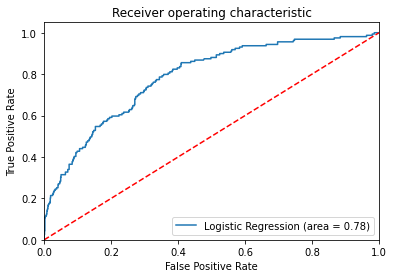

In [29]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
# NIE POPRAWIŁAM PONIŻSZEGO FEATURE SELECTION

In [ ]:
for i in ['MUNICIPAL POLICE_GOOD', 'CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD', 'BCN_over_barri_future', 
          'Gender', 'Barri_transport_GOOD']:
    del x_resampled[i]

In [ ]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

In [ ]:
result.pvalues.sort_values(ascending=False)

In [ ]:
print(result.get_margeff().summary())

In [ ]:
result.pred_table()

In [ ]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()